In [2]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib import pyplot as plt
import matplotlib as mpl
from hdf5manager import hdf5manager as h5
from pandas import pandas as pd
from pandas import DataFrame
from skimage.measure import label, regionprops
import scipy
import scipy.ndimage.filters as filters
import scipy.ndimage as ndimage
from scipy.ndimage.filters import gaussian_filter, convolve
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
from scipy.ndimage.filters import maximum_filter
from scipy.stats import multivariate_normal as mvn
from scipy.spatial.distance import cdist
from skimage.morphology import disk, watershed
from skimage.morphology import erosion, dilation, opening, closing
from opticFlow import opticFlow as of
import colorsys
import wholeBrain as wb
from waveletAnalysis import waveletAnalysis as wave
import cv2
import os
import seaborn as sns
from time import time

Error importing slackNotify.py
	 ERROR :  No module named 'slacker'


In [3]:
path = '/Users/shreyamantripragada/Documents/'
file = '170721_07_c1_gridOpticFlow_metrics.csv'
tsv_output_file = path + file
data = pd.DataFrame.from_csv(tsv_output_file)
print(data.head())

   angs.stdev   angs.mean  mov.mean  mov.std  mov.mode  mov.range  \
0  106.240669  147.795502     0.384    1.869         2     22.682   
1         NaN         NaN     0.000    0.000     16678      0.000   
2         NaN         NaN     0.000    0.000     16678      0.000   
3         NaN         NaN     0.000    0.000     16678      0.000   
4         NaN         NaN     0.000    0.000     16678      0.000   

   mov.eventrest  mov.maxeventval  mov.surfarea  mov.totalmag  ...  \
0              1            0.384          1831      5692.449  ...   
1              0            0.000             0         0.000  ...   
2              0            0.000             0         0.000  ...   
3              0            0.000             0         0.000  ...   
4              0            0.000             0         0.000  ...   

   mov.timefromevent  mov.numlocmax  brain.data  brain.eventrest  \
0                  0            364      -0.038                0   
1                  1        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


In [4]:
%matplotlib inline

col_list = list(data)

data_new = data.copy()
data_new -= data_new.min()
data_new /= data_new.max()
data_new = data_new.fillna(value=0)

In [5]:
a = np.zeros(len(data_new))
a[1445:2388]=1
data_new['classification'] = a

In [20]:
var = pd.DataFrame()
var["mov.mean"] = data_new["mov.mean"]
var["mov.maxeventval"] = data_new["mov.maxeventval"]
var["mov.diffxystd"] = data_new["mov.diffxystd"]
var["mov.diffmaxevents"] = data_new["mov.diffmaxevents"]
var["mov.surfarea"] = data_new["mov.surfarea"]
var["diff.brainmov"] = data_new["diff.brainmov"]
var["brain.data"] = data_new["brain.data"]

var_names = ["mov.mean", "mov.maxeventval", "mov.diffxystd", "mov.diffmaxevents", "mov.surfarea", "diff.brainmov",
"brain.data"]       

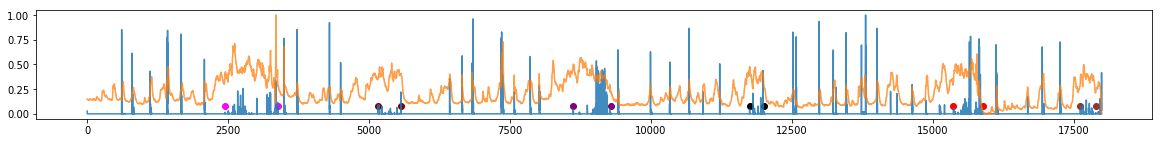

In [21]:
plt.figure(figsize=(20,2))
plt.plot(data_new["mov.mean"], alpha = 0.85)
plt.plot(data_new["brain.data"], alpha = 0.75)
plt.scatter(2445, 0.078, color = "magenta")
plt.scatter(3387, 0.078, color = "magenta")
plt.scatter(5166, 0.078, color = "maroon")
plt.scatter(5568, 0.078, color = "maroon")
plt.scatter(8617, 0.078, color = "purple")
plt.scatter(9297, 0.078, color = "purple")
plt.scatter(11751, 0.078, color = "black")
plt.scatter(12011, 0.078, color = "black")
plt.scatter(15367, 0.078, color = "red")
plt.scatter(15888, 0.078, color = "red")
plt.scatter(17619, 0.078, color = "brown")
plt.scatter(17893, 0.078, color = "brown")

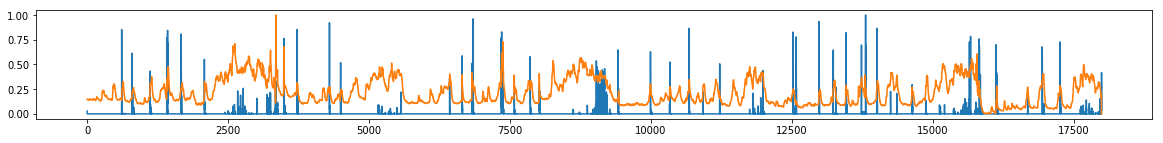

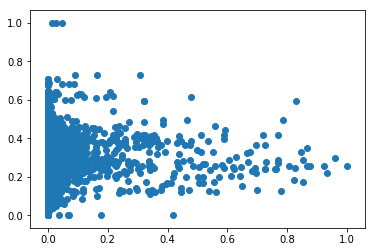

In [24]:
plt.figure(figsize = (20, 2))
plt.plot(data_new["mov.mean"])
plt.plot(data_new["brain.data"])
plt.show()
plt.scatter(data_new["mov.mean"], data_new["brain.data"])

In [30]:
indices_big = np.zeros(len(data_new))
indices_big[2445 : 3388] = 1
indices_big[5166 : 5569] = 1
indices_big[8617 : 9298] = 1
indices_big[11751 : 12024] = 1
indices_big[15367 : 15889] = 1
indices_big[17619 : 17894] = 1
data_new['classification'] = indices_big

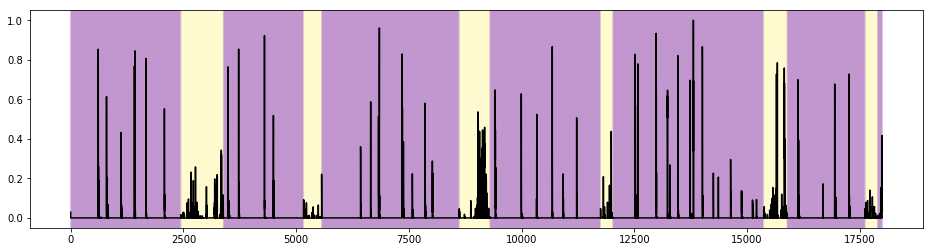

In [36]:
plt.figure(figsize = (16, 4))

def plot_classification(data, indices, color):
    colors_list = ["violet", "magenta", "teal", "silver", "salmon", "pink"]
    num_color = 0;
    if (len(np.unique(indices)) > 2):
        for i in range(len(indices)):
            if (indices[i] == 0):
                plt.axvline(x = i, color = 'blue', alpha = 0.01)
            elif (indices[i] == 1):
                plt.axvline(x = i, color = 'orange', alpha = 0.01)
            elif (indices[i] == 2):
                plt.axvline(x = i, color = 'green', alpha = 0.01 )
            elif (indices[i] == 3):
                plt.axvline(x = i, color = 'purple', alpha = 3)
            else:
                if (num_color == len(colors_list)):
                    num_color = 0
                else:
                    plt.axvline(x = i, color = colors_list[num_color], alpha = 0.01)
                    num_color += num_color
                
    else:
        for i in range(len(indices)):
            if (indices [i] == 0):
                plt.axvline(x = i, color = '#B472CD', alpha = 0.03)
            elif (indices [i] == 1):
                plt.axvline(x = i, color = 'lemonchiffon', alpha = 0.03)
    
    plt.plot(data, color)

plot_classification(data_new["mov.mean"], indices_big, "black")

## MDS Clustering

In [7]:
o_var = pd.DataFrame()
o_var["mov.mean"] = data_new["mov.mean"]
o_var["mov.surfarea"] = data_new["mov.surfarea"]
o_var["mov.diffxystd"] = data_new["mov.diffxystd"]
o_var["mov.diffmaxevents"] = data_new["mov.diffmaxevents"]
o_var["brain.data"] = data_new["brain.data"]
o_var["diff.brainmov"] = data_new["diff.brainmov"]
o_var["classification"] = data_new["classification"]

o_var_names = ["mov.mean", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", "brain.data", "diff.brainmov", "classification"]

b_var = pd.DataFrame()
b_var["mov.range"] = data_new["mov.range"]
b_var["mov.eventrest"] = data_new["mov.eventrest"]
b_var["mov.surfarea"] = data_new["mov.surfarea"]
b_var["mov.diffxystd"] = data_new["mov.diffxystd"]
b_var["mov.diffmaxevents"] = data_new["mov.diffmaxevents"]
b_var["mov.percenterror"] = data_new["mov.percenterror"]
b_var["brain.data"] = data_new["brain.data"]
b_var["brain.eventrest"] = data_new["brain.eventrest"]
b_var["brain.rangemaxmin"] = data_new["brain.rangemaxmin"]
b_var["diff.brainmov"] = data_new["diff.brainmov"]
b_var["classification"] = data_new["classification"]

b_var_names = ["mov.range", "mov.eventrest", "mov.surfarea", "mov.diffxystd", "mov.diffmaxevents", 
             "mov.percenterror", "brain.data", "brain.eventrest", "brain.rangemaxmin", "diff.brainmov", "classification"]


data_big_names = ["angs.stdev", "angs.mean", "mov.mean", "mov.std","mov.mode", "mov.range", "mov.eventrest", "mov.maxeventval", 
                  "mov.surfarea", "mov.totalmag", "mov.firstder", "mov.secder", "mov.stdx", "mov.stdy", "mov.diffmaxevents", 
                 "mov.percent", "mov.percenterror", "mov.timetoevent", "mov.timefromevent", "mov.numlocmax", "brain.data", "brain.eventrest", "brain.rangemaxmin", 
                  "brain.firstder", "brain.secondder", "diff.brainmov", "diff.brainmovfirstder", "diff.brainmovsecder", "classification"]

In [ ]:
print("0. I am here!")
from sklearn.manifold import MDS
print("1. I am here!")

mds = MDS(n_components=2, random_state=42)

print("2. I am here!")
X_reduced_mds = mds.fit_transform(data_new)
print("3. I am here!")

fig, ax = plt.subplots(2, 4, figsize = (20, 15), sharex = True, sharey = True)
print("4. I am here!")

k = 0
print(k)
for i in range(2):
    for j in range(4):
        if k != 7:
            ax[i][j].scatter(X_reduced_mds[:, 0], X_reduced_mds[:, 1], c=data_big[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
        print(k)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_mnist = np.asarray(data_big["mov.mean"])
y_mnist = np.asarray(data_big["classification"])
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

[[0.6249209  0.36728843 0.0284592  ... 0.7939865  0.62467481 0.        ]
 [0.         0.         0.         ... 0.81712461 0.62820477 0.        ]
 [0.         0.         0.         ... 0.81712461 0.62820477 0.        ]
 ...
 [0.667263   0.57566064 0.17779589 ... 0.         0.         0.        ]
 [0.55557712 0.51459768 0.06573779 ... 0.         0.         0.        ]
 [0.44950026 0.26899467 0.03698214 ... 0.         0.         0.        ]]
Xmnist value: [[0.6249209  0.36728843 0.0284592  ... 0.7939865  0.62467481 0.        ]
 [0.         0.         0.         ... 0.81712461 0.62820477 0.        ]
 [0.         0.         0.         ... 0.81712461 0.62820477 0.        ]
 ...
 [0.667263   0.57566064 0.17779589 ... 0.         0.         0.        ]
 [0.55557712 0.51459768 0.06573779 ... 0.         0.         0.        ]
 [0.44950026 0.26899467 0.03698214 ... 0.         0.         0.        ]]
lda.fit(X_mnist, y_mnist): LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,

/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


2
3
4
5
6
7
7


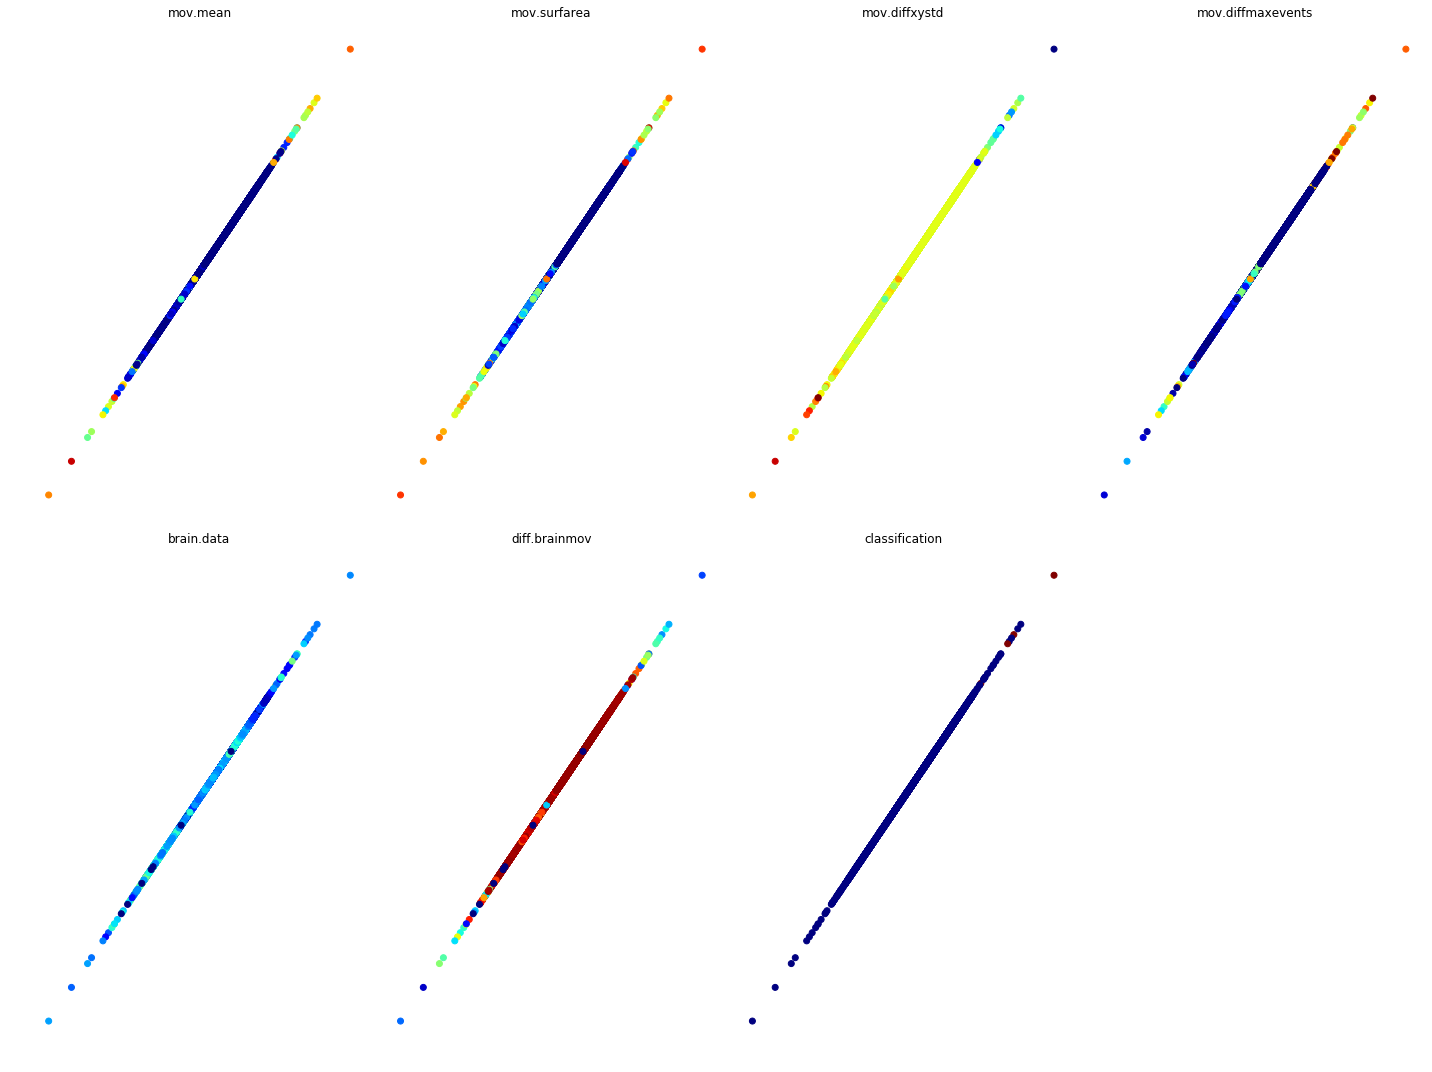

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print(np.array(data_new))
lda = LinearDiscriminantAnalysis(n_components=3)
temp2d = np.array(data_new)
X_mnist = np.array(data_new)
y_mnist = np.array(data_new["classification"])
X_reduced_lda = lda.transform(X_mnist)
#X_reduced_lda.shape[1] = np.array(data_new["mov.mean"])
#X_reduced_lda.append(np.array(data_new[0:18000]))



#print("X_reduced_lda" + str(X_reduced_lda))
#print("X_reduced_lda" + str(X_reduced_lda[:, 0]))
#print("X_reduced_lda" + str(X_reduced_lda[:, 1]))
fig, ax = plt.subplots(2, 4, figsize = (20, 15), sharex = True, sharey = True)

k = 0
print(k)
for i in range(2):
    for j in range(4):
        if k != 7:
            ax[i][j].scatter(X_reduced_lda[:, 0], X_reduced_lda[:, 0], c=data_new[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
        print(k)
plt.tight_layout()
plt.show()

## TSNE Clustering

X_reduced_tsne:[[-87.96666   11.38087 ]
 [ 55.77358  -19.906404]
 [ 55.787098 -19.986174]
 ...
 [-83.31732   15.661253]
 [-83.39713   15.530807]
 [-83.42231   15.477934]]
X_reduced_tsne[-87.96666   55.77358   55.787098 ... -83.31732  -83.39713  -83.42231 ]
X_reduced_tsne[:0,][-87.96666   55.77358   55.787098 ... -83.31732  -83.39713  -83.42231 ]
X_reduced_tsne[:1,][ 11.38087  -19.906404 -19.986174 ...  15.661253  15.530807  15.477934]


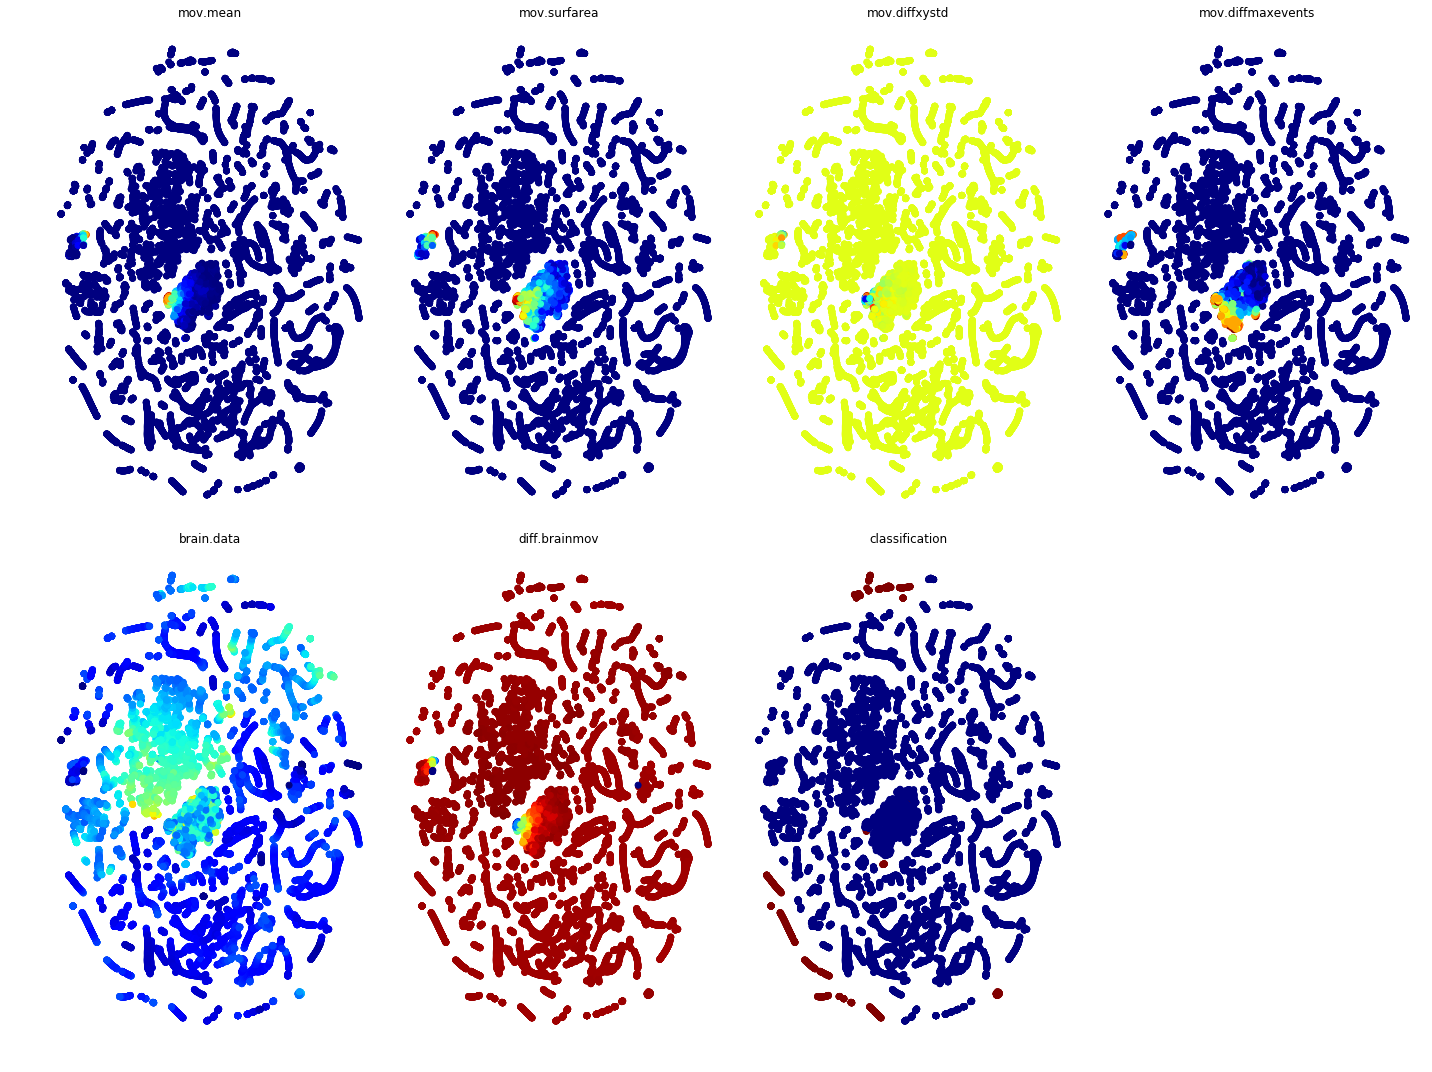

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(temp2d)
print("X_reduced_tsne:" + str(X_reduced_tsne))
print("X_reduced_tsne" + str(X_reduced_tsne[:,0]))
print("X_reduced_tsne[:0,]" + str(X_reduced_tsne[:,0]))
print("X_reduced_tsne[:1,]" + str(X_reduced_tsne[:,1]))

fig, ax = plt.subplots(2, 4, figsize = (20, 15), sharex = True, sharey = True)
k = 0
for i in range(2):
    for j in range(4):
        if k != 7:
            ax[i][j].scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=data_new[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
plt.tight_layout()
plt.show()

In [69]:
print(data_new.shape)
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array(data_new)
y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lda = LinearDiscriminantAnalysis(n_components = 2)
value1 = clf.fit(X, y)
value2 = clf.transform(X)

fig, ax = plt.subplots(2, 4, figsize = (20, 15), sharex = True, sharey = True)

k = 0
print(k)
for i in range(2):
    for j in range(4):
        if k != 7:
            ax[i][j].scatter(X_reduced_lda[:, 0], X_reduced_lda[:, 1], c=data_new[o_var_names[k]], cmap='jet')
            ax[i][j].title.set_text('{0}'.format(o_var_names[k]))
            ax[i][j].axis('off')
            k += 1
        else:
            pass
            ax[i][j].axis('off')
        print(k)
plt.tight_layout()
plt.show()
print(value2)
LinearDiscriminantAnalysis(n_components=None, priors=None)
print(clf.predict([[-0.8, -1]]))

(17999, 30)


ValueError: Found input variables with inconsistent numbers of samples: [17999, 30]